# **Trabajo final Aprendizaje Automático: Predicción de Alzheimer a partir de la escritura**

Proyecto realizado por

Germán José Padua Pleguezuelo

Álvaro Luna Ramírez

Pedro Jiménez García-Ligero


## **VIDEO**:

Por temas de espacio lo hemos subido a esta carpeta de drive: https://drive.google.com/drive/folders/1IftzSpn3gquyHsglcD6CfUTivHLA9CAj?usp=sharing

## **INTRODUCCIÓN**

El alzheimer es una enfermedad neurodegenerativa que produce un deterioro gradual de ciertas habilidades cognitivas y trastornos de la conducta. Los pacientes que la sufren tienen síntomas como pérdida de memoria, desorientación, cambios de humor y cambios conductuales, entre otros.

Como ocurre con la gran mayoría de este tipo de enfermedades, no existe cura para el alzheimer. Sin embargo, una detección precoz puede ayudar a poner medidas que frenen el curso de esta enfermedad y mejoren la calidad de vida de las personas afectadas.

Durante el transcurso de la enfermedad, se produce un deterioro cognitivo que puede traer dificultades en la comunicación. En concreto, en este proyecto nos centraremos en la relación existente entre el alzheimer y la escritura, actividad en la que intervienen habilidades tanto motoras como cognitivas.

Es conocido que durante las primeras fases del alzheimer, los errores más comunes que pueden aparecer en la escritura del paciente son los ortográficos. Sin embargo, conforme la enfermedad avanza, no solo se pierde la capacidad de estructurar frases complejas, sino que se produce un empeoramiento de la grafía, lo que finalmente, lleva a la agrafia o disgrafia del afectado.

Actualmente no existe ningún protocolo experimental estándard sobre la recolección de datos de la escritura para el estudio de enfermedades neurodegenerativas. Nuestro proyecto se basa en el protocolo experimental propuesto en (Cilia et al., [2018](https://doi.org/10.1016/j.procs.2018.10.141)) y la base de datos DARWIN presentada en (Cilia et al., [2022](https://doi.org/10.1016/j.engappai.2022.104822)), con el objetivo de implementar técnicas de aprendizaje automático que sean capaces de diagnosticar si una persona tiene alzheimer basándose en su escritura.



## **DESCRIPCIÓN DEL DATASET**

Vamos a trabajar con un dataset del repositorio de Machine Learning de la Universidad de California en Irvine (UCI) llamado DARWIN (https://archive.ics.uci.edu/dataset/732/darwin). Este conjunto de datos incluye información de la escritura a mano de 174 personas, distribuidas en 451 características de naturaleza heterogénea. De las 174 instancias, hay 89 pacientes con enfermedad de Alzheimer y 85 casos de
personas sanas. La tarea de clasificación a la que nos vamos a enfrentar consiste en distinguir a los pacientes con enfermedad de Alzheimer de las personas sanas.

En primer lugar cargamos los datos del repositorio UCI:

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
darwin = fetch_ucirepo(id=732)

# data (as pandas dataframes)
X = darwin.data.features
y = darwin.data.targets

# metadata
print(darwin.metadata)

# variable information
print(darwin.variables)


{'uci_id': 732, 'name': 'DARWIN', 'repository_url': 'https://archive.ics.uci.edu/dataset/732/darwin', 'data_url': 'https://archive.ics.uci.edu/static/public/732/data.csv', 'abstract': 'The DARWIN dataset includes handwriting data from 174 participants. The classification task consists in distinguishing Alzheimer’s disease patients from healthy people.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 174, 'num_features': 451, 'feature_types': [], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2022, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C55D0K', 'creators': ['Francesco Fontanella'], 'intro_paper': {'title': 'Diagnosing Alzheimer’s disease from on-line handwriting: A novel dataset and performance benchmarking', 'authors': 'Nicole D. Cilia, Giuseppe De Gregorio , Claudio De Stefano, Francesco Fontanella, 

Efectivamente, el dataset contiene 451 características.

Se comprueba también que el dataset contiene 89 instancias de personas con Alzheimer (etiqueta P, de 'Pacient') y 85 instancias de personas sanas(etiqueta H, de 'Healthy'), por lo que es un conjunto balanceado:

Número de casos por clase:
class
P        89
H        85
Name: count, dtype: int64


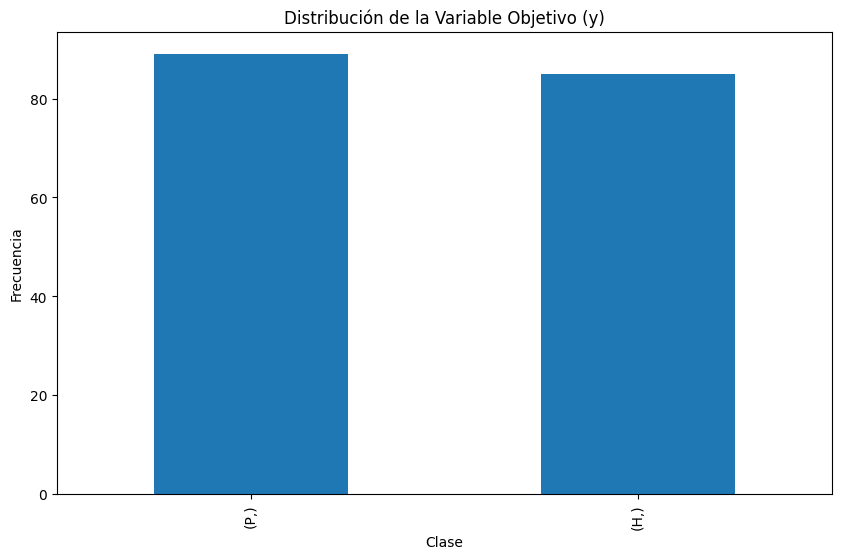

In [ ]:
import matplotlib.pyplot as plt

# Calcular la cantidad de cada clase en la variable objetivo
class_counts = y.value_counts()

# Mostrar el número de casos exactos de cada clase
print("Número de casos por clase:")
print(class_counts)

# Crear el histograma de la variable objetivo 'y'
plt.figure(figsize=(10, 6))
y.value_counts().plot(kind='bar')
plt.title('Distribución de la Variable Objetivo (y)')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

También vamos a comprobar que no hay problemas de 'missing values':

In [ ]:
# Contar valores faltantes en cada columna
missing_values = X.isnull().sum()

print("Valores faltantes por columna:")
print(missing_values)

# Sumar todos los valores, para comprobar que no hay ningún dato faltante
print("\nSuma total de valores faltantes:")
print(missing_values.sum())

Valores faltantes por columna:
ID                  0
air_time1           0
disp_index1         0
gmrt_in_air1        0
gmrt_on_paper1      0
                   ..
num_of_pendown25    0
paper_time25        0
pressure_mean25     0
pressure_var25      0
total_time25        0
Length: 451, dtype: int64

Suma total de valores faltantes:
0


## **SEPARACIÓN EN TEST Y TRAIN**

A la hora de entrenar nos enfrentaremos al problema de que tendremos muy pocos datos disponibles. Hemos intentado generar datos sintéticos de diversas maneras, pero no hemos tenido grandes resultados (explicación y experimentos en el otro cuaderno, "Estudio en Profundidad" https://colab.research.google.com/drive/1o8p3Y9O9BHjbg1O_YH9qyJ_V97xG4P-y?usp=sharing).

Por tanto, separaremos en train (70%) y test(30%) de manera estratificada.


Formas de los conjuntos:
X_train: (121, 451), X_test: (53, 451), y_train: (121, 1), y_test: (53, 1)

Distribución de instancias por clase en el conjunto de entrenamiento:
class
P        62
H        59
Name: count, dtype: int64

Distribución de instancias por clase en el conjunto de prueba:
class
P        27
H        26
Name: count, dtype: int64


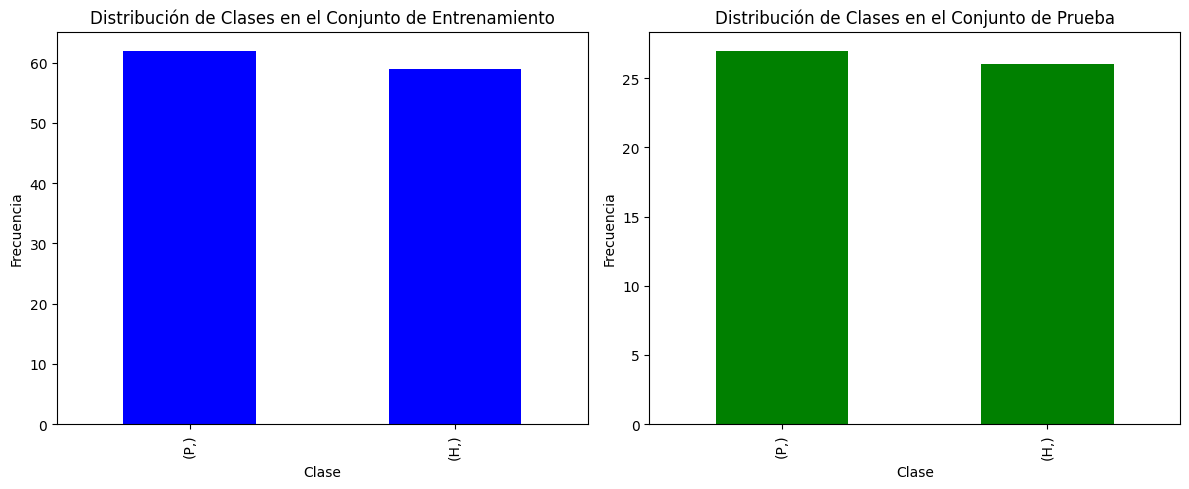

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Mostrar las formas de los conjuntos resultantes
print("Formas de los conjuntos:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

# Verificar la distribución de instancias por clase en cada conjunto
train_class_distribution = y_train.value_counts()
test_class_distribution = y_test.value_counts()

print("\nDistribución de instancias por clase en el conjunto de entrenamiento:")
print(train_class_distribution)

print("\nDistribución de instancias por clase en el conjunto de prueba:")
print(test_class_distribution)

# Visualizar la distribución de clases en gráficos de barras
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

train_class_distribution.plot(kind='bar', ax=ax[0], color='blue')
ax[0].set_title('Distribución de Clases en el Conjunto de Entrenamiento')
ax[0].set_xlabel('Clase')
ax[0].set_ylabel('Frecuencia')

test_class_distribution.plot(kind='bar', ax=ax[1], color='green')
ax[1].set_title('Distribución de Clases en el Conjunto de Prueba')
ax[1].set_xlabel('Clase')
ax[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


## **ANÁLISIS EXPLORATORIO**

Al tener tantas características (451) es todo un desafío hacer un análisis exploratorio de nuestro problema.

### **Estadísticas descriptivas**


In [ ]:
import pandas as pd

# Configurar pandas para mostrar más filas y columnas
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas

# Estadísticas descriptivas de las variables numéricas
X_train.describe()


,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,mean_jerk_on_paper1,mean_speed_in_air1,mean_speed_on_paper1,num_of_pendown1,paper_time1,pressure_mean1,pressure_var1,total_time1,air_time2,disp_index2,gmrt_in_air2,gmrt_on_paper2,max_x_extension2,max_y_extension2,mean_acc_in_air2,mean_acc_on_paper2,mean_gmrt2,mean_jerk_in_air2,mean_jerk_on_paper2,mean_speed_in_air2,mean_speed_on_paper2,num_of_pendown2,paper_time2,pressure_mean2,pressure_var2,total_time2,air_time3,disp_index3,gmrt_in_air3,gmrt_on_paper3,max_x_extension3,max_y_extension3,mean_acc_in_air3,mean_acc_on_paper3,mean_gmrt3,mean_jerk_in_air3,mean_jerk_on_paper3,mean_speed_in_air3,mean_speed_on_paper3,num_of_pendown3,paper_time3,pressure_mean3,pressure_var3,total_time3,air_time4,disp_index4,gmrt_in_air4,gmrt_on_paper4,max_x_extension4,max_y_extension4,mean_acc_in_air4,mean_acc_on_paper4,mean_gmrt4,mean_jerk_in_air4,mean_jerk_on_paper4,mean_speed_in_air4,mean_speed_on_paper4,num_of_pendown4,paper_time4,pressure_mean4,pressure_var4,total_time4,air_time5,disp_index5,gmrt_in_air5,gmrt_on_paper5,max_x_extension5,max_y_extension5,mean_acc_in_air5,mean_acc_on_paper5,mean_gmrt5,mean_jerk_in_air5,mean_jerk_on_paper5,mean_speed_in_air5,mean_speed_on_paper5,num_of_pendown5,paper_time5,pressure_mean5,pressure_var5,total_time5,air_time6,disp_index6,gmrt_in_air6,gmrt_on_paper6,max_x_extension6,max_y_extension6,mean_acc_in_air6,mean_acc_on_paper6,mean_gmrt6,mean_jerk_in_air6,mean_jerk_on_paper6,mean_speed_in_air6,mean_speed_on_paper6,num_of_pendown6,paper_time6,pressure_mean6,pressure_var6,total_time6,air_time7,disp_index7,gmrt_in_air7,gmrt_on_paper7,max_x_extension7,max_y_extension7,mean_acc_in_air7,mean_acc_on_paper7,mean_gmrt7,mean_jerk_in_air7,mean_jerk_on_paper7,mean_speed_in_air7,mean_speed_on_paper7,num_of_pendown7,paper_time7,pressure_mean7,pressure_var7,total_time7,air_time8,disp_index8,gmrt_in_air8,gmrt_on_paper8,max_x_extension8,max_y_extension8,mean_acc_in_air8,mean_acc_on_paper8,mean_gmrt8,mean_jerk_in_air8,mean_jerk_on_paper8,mean_speed_in_air8,mean_speed_on_paper8,num_of_pendown8,paper_time8,pressure_mean8,pressure_var8,total_time8,air_time9,disp_index9,gmrt_in_air9,gmrt_on_paper9,max_x_extension9,max_y_extension9,mean_acc_in_air9,mean_acc_on_paper9,mean_gmrt9,mean_jerk_in_air9,mean_jerk_on_paper9,mean_speed_in_air9,mean_speed_on_paper9,num_of_pendown9,paper_time9,pressure_mean9,pressure_var9,total_time9,air_time10,disp_index10,gmrt_in_air10,gmrt_on_paper10,max_x_extension10,max_y_extension10,mean_acc_in_air10,mean_acc_on_paper10,mean_gmrt10,mean_jerk_in_air10,mean_jerk_on_paper10,mean_speed_in_air10,mean_speed_on_paper10,num_of_pendown10,paper_time10,pressure_mean10,pressure_var10,total_time10,air_time11,disp_index11,gmrt_in_air11,gmrt_on_paper11,max_x_extension11,max_y_extension11,mean_acc_in_air11,mean_acc_on_paper11,mean_gmrt11,mean_jerk_in_air11,mean_jerk_on_paper11,mean_speed_in_air11,mean_speed_on_paper11,num_of_pendown11,paper_time11,pressure_mean11,pressure_var11,total_time11,air_time12,disp_index12,gmrt_in_air12,gmrt_on_paper12,max_x_extension12,max_y_extension12,mean_acc_in_air12,mean_acc_on_paper12,mean_gmrt12,mean_jerk_in_air12,mean_jerk_on_paper12,mean_speed_in_air12,mean_speed_on_paper12,num_of_pendown12,paper_time12,pressure_mean12,pressure_var12,total_time12,air_time13,disp_index13,gmrt_in_air13,gmrt_on_paper13,max_x_extension13,max_y_extension13,mean_acc_in_air13,mean_acc_on_paper13,mean_gmrt13,mean_jerk_in_air13,mean_jerk_on_paper13,mean_speed_in_air13,mean_speed_on_paper13,num_of_pendown13,paper_time13,pressure_mean13,pressure_var13,total_time13,air_time14,disp_index14,gmrt_in_air14,gmrt_on_paper14,max_x_extension14,max_y_extension14,mean_acc_in_air14,mean_acc_on_paper14,mean_gmrt14,mean_jerk_in_air14,mean_jerk_on_paper14,mean_speed_in_air14,mean_speed_on_paper14,num_of_pendown14,paper_time14,pressure_mean14,pressure_var14,total_time14,air_time15,disp_i

In [ ]:
# Restaurar la configuración de visualización por defecto si es necesario
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

Eliminamos la columna ID, que es simplemente un identificador de cada instancia por lo que no nos aporta nada.

In [ ]:
columns_to_drop = ['ID']
X = X.drop(columns=columns_to_drop)
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

### **Boxplots**

A continuación se muestran boxplots de algunas de las características del conjunto de entrenamiento. No se muestran todas porque son demasiadas.


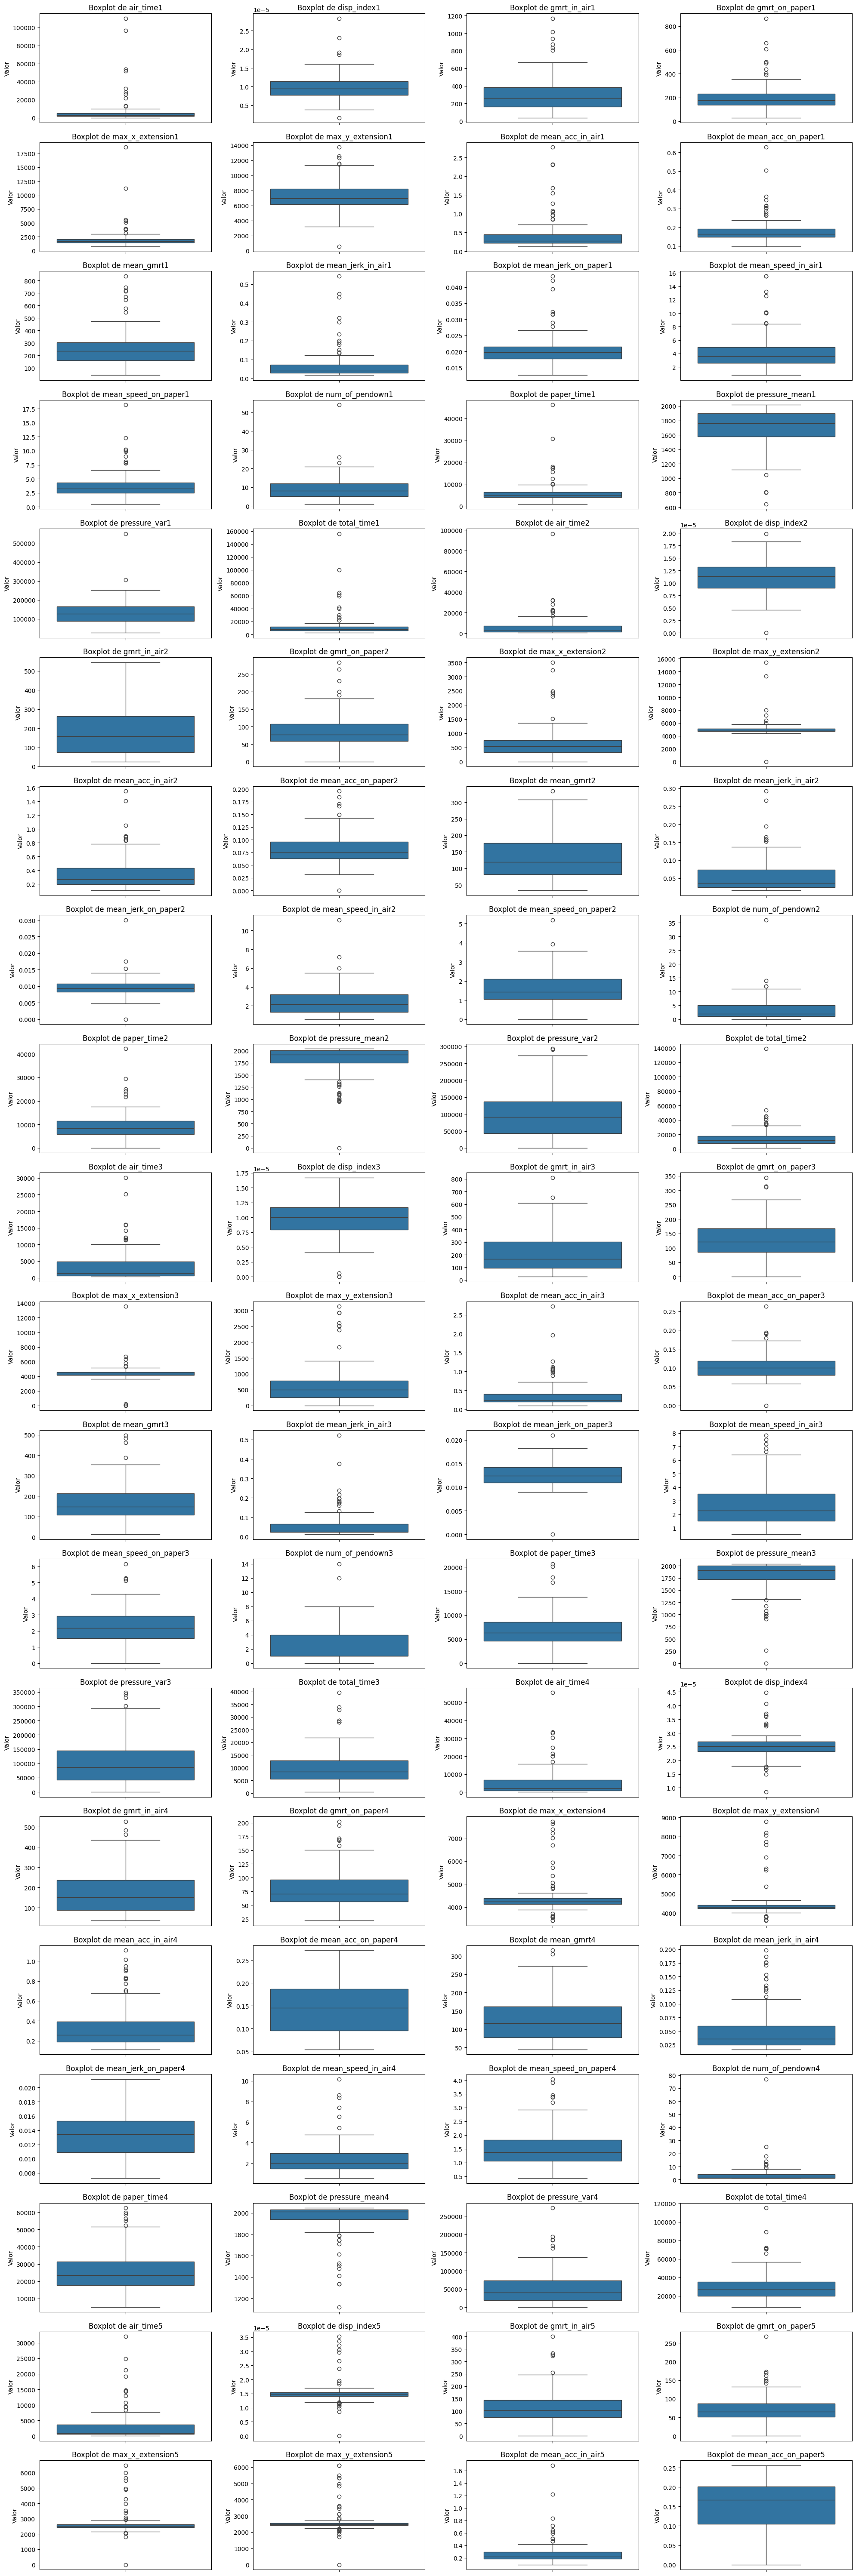

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las primeras 80 características
subset_features = X_train.iloc[:, :80]

# Crear boxplots individuales para cada característica
plt.figure(figsize=(20, 60))  # Ajusta el tamaño de la figura según sea necesario
for i, col in enumerate(subset_features.columns):
    plt.subplot(20, 4, i + 1)  # 20 filas, 4 columnas de subgráficos
    sns.boxplot(y=subset_features[col])  # Cambiado a 'y' para boxplots verticales
    plt.title(f'Boxplot de {col}')
    plt.xlabel('')
    plt.ylabel('Valor')
    plt.xticks(rotation=90)  # Rotar etiquetas del eje x para una mejor visualización

plt.tight_layout()  # Ajustar el diseño de los subgráficos
plt.show()


### **Normalización**

Ahora se normalizan los datos numéricos con MinMaxScaler.

Empezamos eliminando las columnas no numéricas, que pueden causar errores.

In [ ]:
# Primero, vamos a identificar las columnas no numéricas
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns

# Crear un nuevo dataframe excluyendo las columnas no numéricas
data_numeric = X_train.drop(columns=non_numeric_cols)

# Calcular la varianza de cada variable en el dataframe numérico
variance_numeric = data_numeric.var()

# Mostrar la cantidad de columnas no numéricas
print("Cantidad de columnas no numéricas:", len(non_numeric_cols))

# Mostrar la cantidad de columnas numéricas
print("Cantidad de columnas numéricas:", len(data_numeric.columns))


Cantidad de columnas no numéricas: 0
Cantidad de columnas numéricas: 450


Ahora no hay ninguna columna no numérica. La única era ID, que la hemos eliminado.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Crear una instancia de MinMaxScaler
minmax_scaler = MinMaxScaler()

# Normalizar las características con alta varianza
data_numeric_normalized = minmax_scaler.fit_transform(data_numeric)

# Convertir el resultado a un DataFrame para una mejor legibilidad
data_numeric_normalized = pd.DataFrame(data_numeric_normalized, columns=data_numeric.columns)

# Mostrar las primeras filas del DataFrame normalizado
data_numeric_normalized.head()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
0,0.016424,0.172051,0.493685,0.561438,0.087517,0.599484,0.346319,0.408565,0.636050,0.331353,...,0.274655,0.274632,0.364700,0.240770,0.261370,0.605634,0.193638,0.829258,0.727174,0.014432
1,0.053776,0.112322,0.380937,0.268900,0.038604,0.413406,1.000000,0.139133,0.402327,1.000000,...,0.400772,0.196530,0.312220,0.307484,0.440352,0.239437,0.125043,0.821790,0.493495,0.006340
2,0.070109,0.184823,0.190783,0.252703,0.074070,0.388383,0.140273,0.182863,0.258636,0.130044,...,0.580246,0.569701,0.357310,0.531625,0.500125,0.140845,0.152403,0.895837,0.360149,0.010129
3,0.000000,0.149887,0.741416,0.297635,0.082362,0.306718,0.310931,0.243207,0.673690,0.041043,...,0.628086,0.358771,0.556565,0.382724,0.887337,0.633803,0.205913,0.857514,0.564314,0.017498
4,0.051911,0.252066,0.083889,0.068060,0.025437,0.435017,0.096936,0.112614,0.085714,0.083971,...,0.309303,0.244863,0.321857,0.224554,0.353579,0.415493,0.211402,0.670616,0.456765,0.015958


Comprobación de que se ha normalizado correctamente:

In [ ]:
data_numeric_normalized.describe()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,...,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,0.059530,0.307015,0.242098,0.207992,0.075112,0.509311,0.113307,0.158163,0.271648,0.100733,...,0.408481,0.330848,0.283557,0.333747,0.420995,0.339367,0.233619,0.760578,0.420193,0.034655
std,0.136015,0.134609,0.179096,0.144858,0.107829,0.149436,0.159542,0.132115,0.184726,0.156720,...,0.178571,0.187426,0.181827,0.169085,0.191738,0.180503,0.163923,0.192887,0.176870,0.094493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.013603,0.226897,0.112951,0.126817,0.037315,0.425311,0.033277,0.093840,0.149802,0.024644,...,0.279570,0.197947,0.169432,0.216356,0.309989,0.211268,0.148081,0.675559,0.291044,0.008418
50%,0.025933,0.292637,0.198072,0.177513,0.052443,0.484152,0.055251,0.125520,0.243475,0.043261,...,0.410500,0.299564,0.249621,0.339759,0.418564,0.295775,0.182011,0.807420,0.398559,0.013943
75%,0.045996,0.365139,0.305074,0.242779,0.075359,0.582803,0.120628,0.178155,0.332546,0.104237,...,0.519424,0.472758,0.357974,0.412511,0.514615,0.457746,0.268759,0.903732,0.539264,0.028655
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Efectivamente, los mínimos son 0 y los máximos 1.

Ahora se hace lo análogo para los datos de test:

In [ ]:
# Primero, vamos a identificar las columnas no numéricas
non_numeric_cols = X_test.select_dtypes(exclude=['number']).columns

# Crear un nuevo dataframe excluyendo las columnas no numéricas
data_numeric_test = X_test.drop(columns=non_numeric_cols)

# Normalizar las características con alta varianza con el scaler entrenado para train (si no sería data snooping)
data_numeric__test_normalized = minmax_scaler.transform(data_numeric_test)

# Convertir el resultado a un DataFrame para una mejor legibilidad
data_numeric__test_normalized = pd.DataFrame(data_numeric__test_normalized, columns=data_numeric_test.columns)

# Mostrar las primeras filas del DataFrame normalizado
data_numeric__test_normalized.describe()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.031355,0.294792,0.203489,0.195564,0.053658,0.520788,0.100208,0.153535,0.237675,0.090007,...,0.381152,0.289815,0.303043,0.312104,0.394617,0.331252,0.238009,0.750039,0.411082,0.055521
std,0.029157,0.105605,0.113528,0.104343,0.034891,0.199933,0.102245,0.095600,0.113976,0.101077,...,0.173736,0.184506,0.185232,0.172590,0.162612,0.222284,0.169110,0.253426,0.170029,0.236188
min,0.003640,0.005635,-0.007397,0.064362,0.003474,0.043676,-0.022469,0.046882,0.031568,-0.008216,...,-0.020356,-0.036665,-0.088727,-0.029308,0.069156,-0.042254,0.071750,0.055414,0.141184,0.001696
25%,0.016106,0.227273,0.125944,0.133207,0.028182,0.400591,0.036041,0.098568,0.158219,0.027754,...,0.309421,0.173989,0.163027,0.200226,0.329843,0.197183,0.135373,0.647826,0.266033,0.008920
50%,0.025614,0.287754,0.188662,0.175008,0.049810,0.501820,0.056640,0.134525,0.223986,0.046883,...,0.377210,0.256873,0.270925,0.293226,0.399049,0.323944,0.190050,0.864319,0.412043,0.014341
75%,0.039536,0.365139,0.244461,0.244901,0.066338,0.600015,0.115202,0.157763,0.269499,0.102571,...,0.485544,0.412905,0.408789,0.399527,0.488804,0.408451,0.247363,0.919041,0.512898,0.030015
max,0.204322,0.537941,0.589409,0.515804,0.178339,1.154231,0.471043,0.471018,0.640321,0.463079,...,0.751333,0.730902,0.748770,0.715091,0.771743,1.204225,1.068854,0.977252,0.825523,1.733706


### **Varianza y Matriz de Correlación**

In [ ]:
# Seleccionar variables con la mayor varianza
var_threshold = 0.01  # Umbral de varianza, ajustable según se considere
low_variance_cols = data_numeric_normalized.var()[data_numeric_normalized.var() < var_threshold].index


# Eliminar estas características del DataFrame
data_numeric_normalized = data_numeric_normalized.drop(columns=low_variance_cols)
data_numeric__test_normalized = data_numeric__test_normalized.drop(columns=low_variance_cols)

# Verificar el número de características eliminadas
print(f"Número de características eliminadas: {len(low_variance_cols)}")

Número de características eliminadas: 15


In [ ]:
# Calcular la varianza de cada variable en el dataframe numérico
variance_numeric = data_numeric_normalized.var()

variance_numeric

air_time1                0.018500
disp_index1              0.018119
gmrt_in_air1             0.032075
gmrt_on_paper1           0.020984
max_x_extension1         0.011627
                           ...   
mean_speed_on_paper25    0.036764
num_of_pendown25         0.032581
paper_time25             0.026871
pressure_mean25          0.037205
pressure_var25           0.031283
Length: 435, dtype: float64

In [ ]:
# Seleccionar variables con la mayor varianza
var_threshold = 0.05  # Umbral de varianza, ajustable según se considere
high_variance_cols = data_numeric_normalized.var()[data_numeric_normalized.var() > var_threshold].index

high_variance_cols

Index(['gmrt_in_air2', 'mean_gmrt2', 'pressure_var2', 'pressure_var3',
       'mean_acc_on_paper4', 'mean_gmrt7', 'mean_speed_on_paper7',
       'pressure_mean8', 'pressure_mean10', 'max_x_extension14',
       'max_y_extension14', 'gmrt_in_air15', 'pressure_mean15',
       'mean_acc_on_paper17', 'pressure_var19', 'gmrt_in_air20', 'mean_gmrt20',
       'mean_acc_on_paper21', 'gmrt_in_air22', 'mean_gmrt22',
       'mean_acc_on_paper23', 'mean_gmrt23'],
      dtype='object')

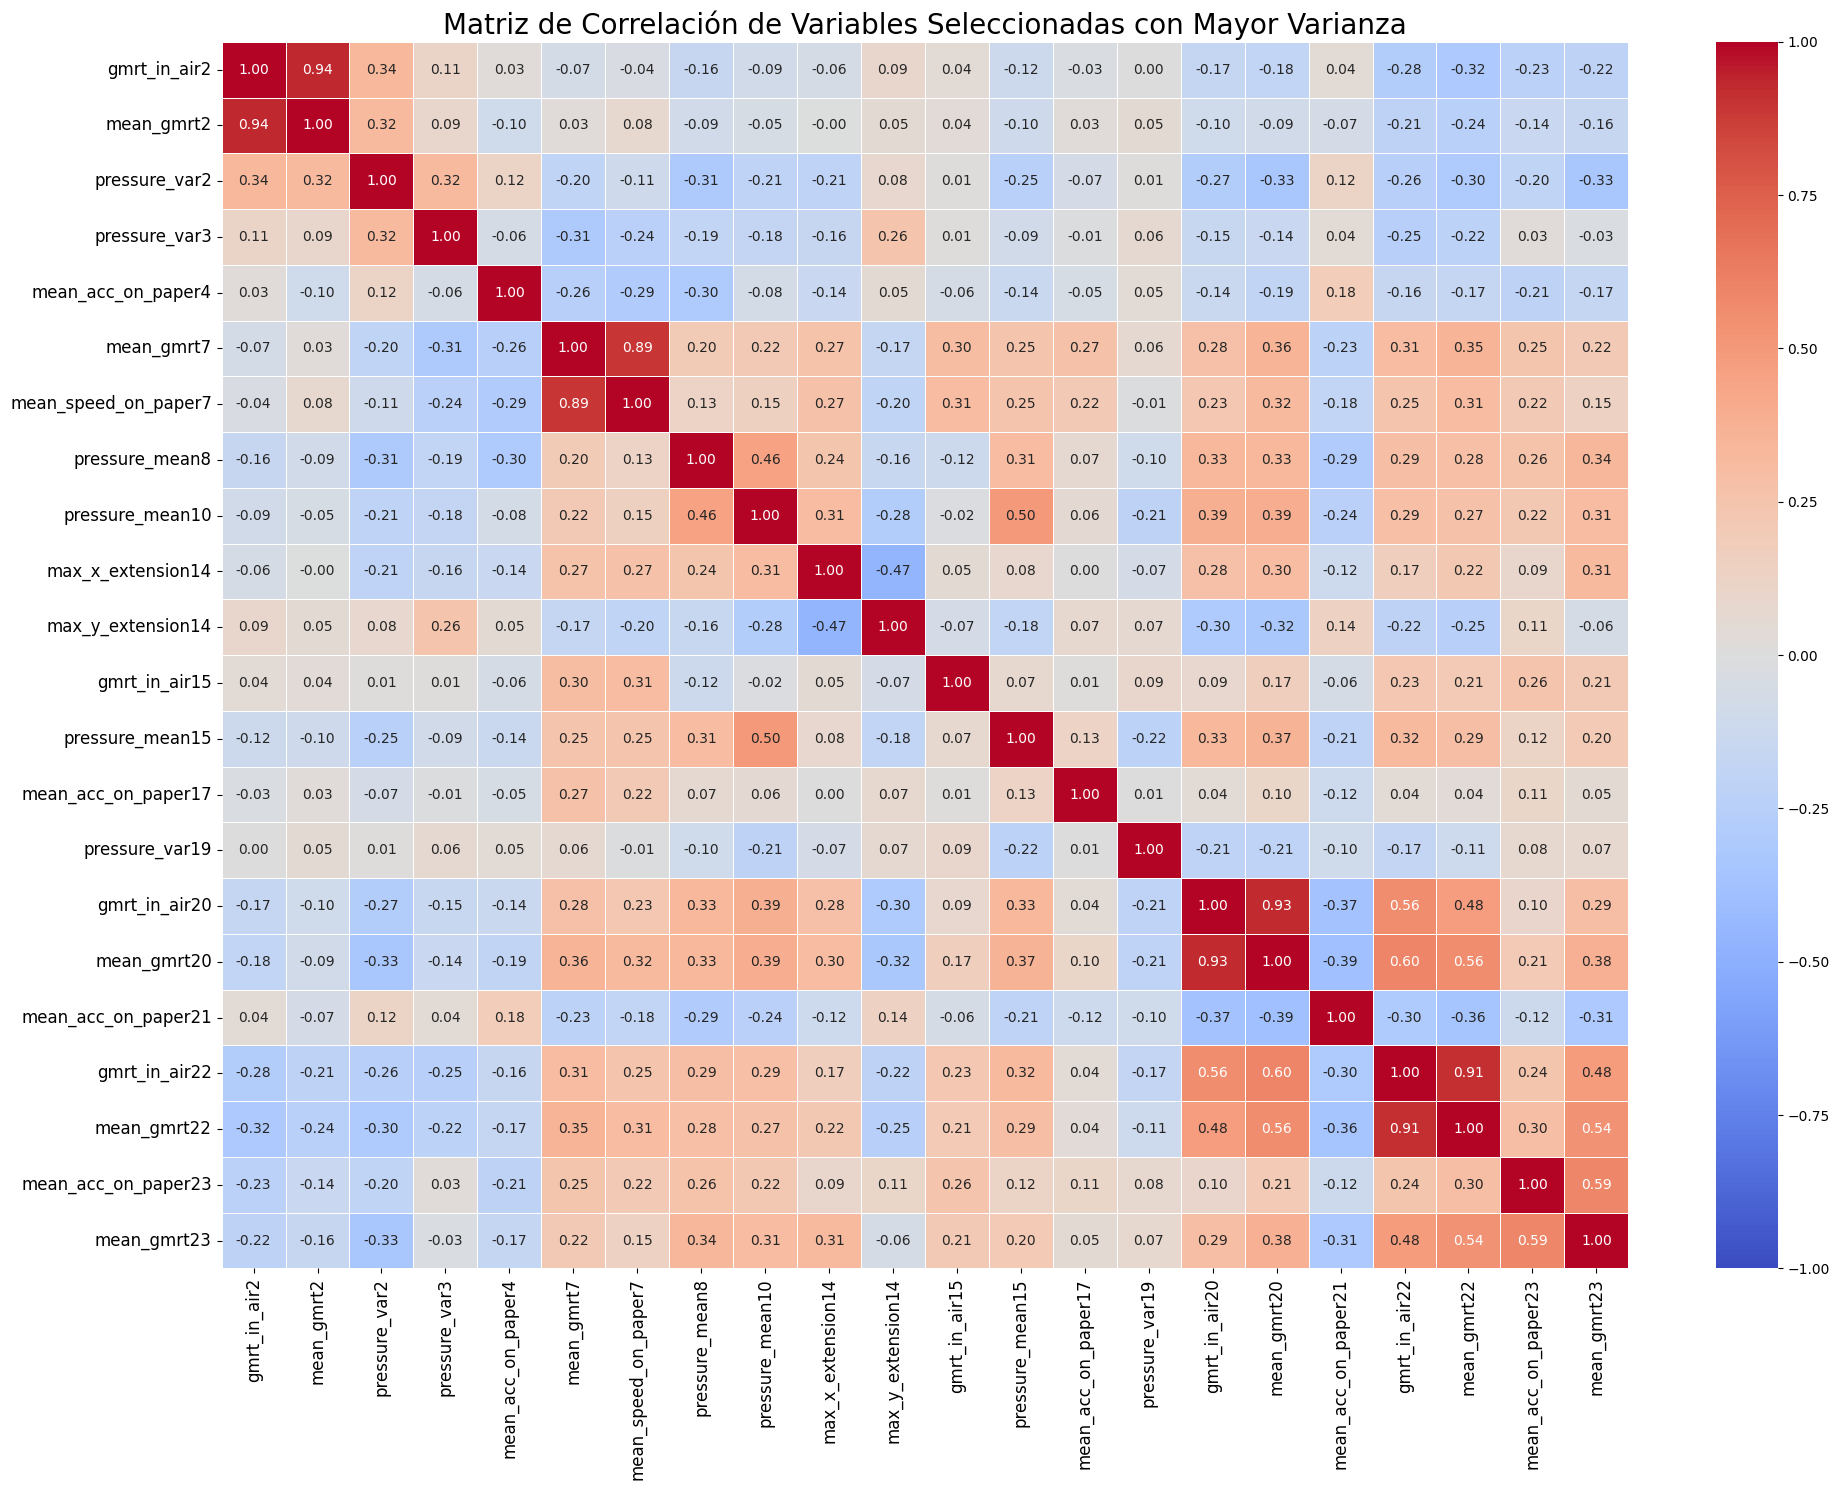

In [ ]:
high_variance_data = data_numeric_normalized[high_variance_cols]

# Matriz de correlación de las principales variables numéricas
correlation_matrix = high_variance_data.corr()

import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico de la matriz de correlación
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

# Mejoras en el estilo del gráfico
plt.title('Matriz de Correlación de Variables Seleccionadas con Mayor Varianza', fontsize=20)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

Se aprecia una alta varianza entre numerosas carcaterísticas. Vamos a reducir dimensionalidad, ya que tenemos una barbaridad de características:

### **Reducción de dimensionalidad**

Vamos a probar dos opciones y nos quedaremos con la que mejor resultados nos dé.

#### **OPCIÓN 1: VarianceThreshold, SelectKBest, feature_selection(Random Forest), PCA**

**SelectKBest**

SelectKBest es un método que selecciona las k mejores características basándose en una función de puntuación estadística. Este método evalúa cada característica individualmente con respecto a la variable objetivo y selecciona las k características que tienen las mejores puntuaciones. Es flexible y permite utilizar diversas métricas de puntuación, como chi-cuadrado, ANOVA F-value, o correlación, dependiendo del tipo de datos y del problema específico.


**Feature Selection usando Random Forest**

La selección de características con Random Forest es una técnica que utiliza la importancia de las características derivada de un modelo de Random Forest. Los Random Forests son capaces de medir la importancia de cada característica a través de la disminución de la impureza (como el Gini o la entropía) en los árboles del bosque. Las características más importantes son aquellas que contribuyen más a mejorar la precisión del modelo. Esta técnica es muy útil porque Random Forests son robustos y pueden manejar datos no lineales y con interacciones complejas entre características.


**PCA**

El PCA se utiliza como una técnica de preprocesamiento de datos para reducir la complejidad de los modelos y mejorar su rendimiento, especialmente en conjuntos de datos con muchas características redundantes o irrelevantes.

Transforma un conjunto de datos con muchas variables correlacionadas en un conjunto de datos con menos variables no correlacionadas, llamadas componentes principales. Estas componentes están ordenadas por la cantidad de varianza que capturan en los datos originales. Las primeras componentes principales conservan la mayor cantidad de varianza, lo que permite resumir la información más importante del conjunto de datos.

Las componentes principales son ortogonales entre sí, lo que significa que son independientes linealmente. Esto facilita la interpretación de los patrones presentes en los datos y puede ayudar a eliminar la multicolinealidad entre las variables.


In [ ]:
y_train = y_train.values.ravel()  # Convertir el DataFrame de una columna a un vector

In [ ]:
X_train = data_numeric_normalized


In [ ]:
X_test = data_numeric__test_normalized

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectFromModel, SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('univ_select', SelectKBest(f_classif, k=30)),  # Selección univariada
    ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='median')),  # Selección de características basada en Random Forest
    ('pca', PCA(n_components=0.95)),  # Reducción de dimensionalidad con PCA
    ('clf', RandomForestClassifier(n_estimators=100)) # Clasificador final
])


# Definir los parámetros a ajustar
param_grid = {
    'univ_select__k': [70, 100, 200],
    'feature_selection__estimator__n_estimators': [100, 200],
    'feature_selection__threshold': ['median','0.1*mean', '1.5*mean'],
    'pca__n_components': [0.90, 0.95, 0.99],
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')


# Entrenar GridSearchCV
grid_search.fit(X_train, y_train)

# Mejor modelo y su precisión
best_model = grid_search.best_estimator_
best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_

print(f'Best Accuracy: {best_accuracy:.2f}')
print(f'Best Parameters: {best_params}')

Best Accuracy: 0.91
Best Parameters: {'feature_selection__estimator__n_estimators': 100, 'feature_selection__threshold': '1.5*mean', 'pca__n_components': 0.9, 'univ_select__k': 200}


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectFromModel, SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('univ_select', SelectKBest(f_classif, k=200)),  # Selección univariada
    ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='1.5*mean')),  # Selección de características basada en Random Forest
    ('pca', PCA(n_components=0.9)),  # Reducción de dimensionalidad con PCA
])

# Aplicar las transformaciones al conjunto de entrenamiento
X_train_transformed = pipeline.fit_transform(X_train, y_train)

X_test_transformed = pipeline.transform(X_test)

# Ver las dimensiones de los datos transformados
print(X_train_transformed.shape)

# Ver las dimensiones de los datos transformados
print(X_test_transformed.shape)

(121, 16)
(53, 16)


In [ ]:
import numpy as np

X_train_1 = np.float32(X_train_transformed)

X_test_1 = np.float32(X_test_transformed)

In [ ]:
print(X_train_1.shape)

(121, 16)


In [ ]:
print(X_test_1.shape)

(53, 16)


In [ ]:
# Crear una instancia de MinMaxScaler
minmax_scaler = MinMaxScaler()

# Normalizar las características
X_train_1 = minmax_scaler.fit_transform(X_train_1)

# Normalizar las características con alta varianza
X_test_1 = minmax_scaler.transform(X_test_1)

In [ ]:
X_train_1 = np.float32(X_train_1)
X_test_1 = np.float32(X_test_1)

#### **OPCIÓN 2: Solo PCA**

Primero, observando el gráfico se determina el número de componentes principales a utilizar.  Un 90% de varianza acumulada se suele dar por bueno.

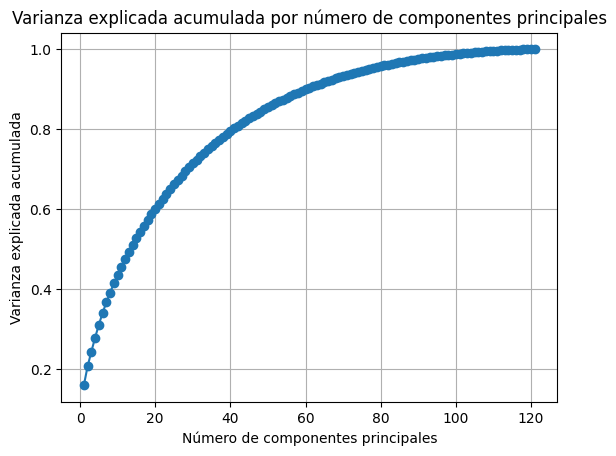

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# Inicializar el objeto PCA
pca = PCA()

# Ajustar PCA a los datos de entrenamiento
X_train_pca = pca.fit_transform(data_numeric_normalized)

# Calcular la varianza explicada acumulada
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Trazar el gráfico de la varianza explicada acumulada
plt.plot(np.arange(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.grid(True)
plt.show()

Viendo el gráfico de arriba unas 60 componentes deberían estar bien, ya supera el 0.9 de varianza explicada:

In [ ]:
# Inicializar el objeto PCA y ajustarlo a los datos
pca = PCA(n_components=60)  # Especifica el número de componentes principales deseados
pca.fit(data_numeric_normalized)
X_train_pca = pca.transform(data_numeric_normalized)
X_test_pca = pca.transform(data_numeric__test_normalized)

# Ver la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:", pca.explained_variance_ratio_)

# Calcular la suma de la varianza explicada
explained_variance_ratio = pca.explained_variance_ratio_
total_variance_explained = sum(explained_variance_ratio)
print("\nSuma de la varianza explicada:", total_variance_explained)

Varianza explicada por cada componente principal: [0.15964245 0.04743238 0.03695952 0.0350113  0.0323744  0.02975193
 0.02625131 0.02452668 0.02300356 0.02067773 0.0203025  0.01941416
 0.01813167 0.0171517  0.0166966  0.01575201 0.01532467 0.01492527
 0.01410547 0.0135427  0.01293479 0.01265111 0.01216636 0.0119545
 0.01160536 0.01107343 0.01088788 0.01055223 0.01020402 0.00972953
 0.00936829 0.00911385 0.00865401 0.00853257 0.00801599 0.00780773
 0.00751512 0.00740997 0.00722251 0.00716414 0.00675661 0.00657083
 0.00645472 0.00637038 0.00583989 0.00578934 0.00559975 0.00558244
 0.00528885 0.00517483 0.00513516 0.00500408 0.00487686 0.004709
 0.00466619 0.00452854 0.004156   0.00407253 0.00404803 0.0038589 ]

Suma de la varianza explicada: 0.900024299636499


In [ ]:
X_train_pca.shape

(121, 60)

In [ ]:
type(X_train_pca[0][0])

numpy.float64

In [ ]:
X_train_2 = np.float32(X_train_pca)
X_test_2 = np.float32(X_test_pca)


In [ ]:
type(X_train_2[0][0])

numpy.float32

Para el vae implementado queremos que los datos sean float32, no float64.

In [ ]:
# Crear una instancia de MinMaxScaler
minmax_scaler = MinMaxScaler()

# Normalizar las características
X_train_2 = minmax_scaler.fit_transform(X_train_2)
X_train_2 = np.float32(X_train_2)

X_test_2 = minmax_scaler.transform(X_test_2)
X_test_2 = np.float32(X_test_2)

## **PROTOCOLO DE VALIDACIÓN EXPERIMENTAL**

Las métricas a utilizar son 'Accuracy' y 'F1-score'.

**Accuracy** (Exactitud):

La exactitud indica la proporción de predicciones correctas realizadas por el modelo sobre el total de predicciones. Es una medida simple pero importante, ya que proporciona una visión general del rendimiento del modelo. Sin embargo, no distingue entre los diferentes tipos de errores que el modelo puede cometer

Cabe destacar que puede ser engañosa en casos de conjuntos de datos desbalanceados, donde una clase puede dominar en términos de frecuencia (no es nuestro caso).



**F1-score**:

El f1-score es una métrica que combina la precisión y el recall (proporción de verdaderos positivos frente a falsos negativos) en una sola medida. Es especialmente útil en problemas de clasificación donde las clases están desbalanceadas.

Se calcula como la media armónica entre precisión y recall, donde precisión es la proporción de verdaderos positivos respecto a todos los casos positivos predichos, y recall es la proporción de verdaderos positivos respecto a todos los casos positivos reales.

El f1-score alcanza su mejor valor en 1 y su peor valor en 0. Un f1-score alto indica un buen equilibrio entre precisión y recall, mientras que un valor bajo puede indicar problemas en el modelo, como desequilibrio de clases o errores en la clasificación.


## **MODELOS**


Para resolver nuestro problema vamos a combinar y buscar los mejores parámetros para un stack de modelos de aprendizaje automático como SVM (Support Vector Machine), Random Forest, KNN (K-Nearest Neighbors) y LightGBM (Light Gradient Boosting Machine).

En primer lugar se van a buscar los mejores hiperparámetros para cada uno de estos modelos.

### **SVM**


SVM es un modelo de clasificación que busca encontrar el hiperplano que mejor separa las clases en un espacio de características. Utiliza "vectores de soporte", los puntos de datos más cercanos al hiperplano, para maximizar el margen entre las clases. Los SVM pueden manejar problemas no lineales mediante el uso de funciones kernel que transforman los datos a un espacio de mayor dimensión, permitiendo la separación no lineal de las clases. Es especialmente útil en aplicaciones de reconocimiento de patrones y clasificación de textos.

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Definir el pipeline para incluir la normalización y el modelo SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización de los datos
    ('svc', SVC())  # Clasificador SVC
])

# Definir el rango de parámetros para GridSearchCV
param_grid = {
    'svc__C': [0.1, 1, 10, 100],  # Parámetro de regularización
    'svc__gamma': [1, 0.1, 0.01, 0.001],  # Coeficiente del kernel
    'svc__kernel': ['linear', 'rbf']  # Tipo de kernel
}

# Configurar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5,n_jobs=-1)

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train_1, y_train)

# Imprimir los mejores parámetros y el mejor score
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor score: {grid_search.best_score_}")


Mejores parámetros: {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
Mejor score: 0.9006666666666667


In [ ]:
# Normalizar los datos (si es necesario)
scaler = StandardScaler()
X_train_1_scaled = scaler.fit_transform(X_train_1)

best_svc = SVC(C = 1, gamma = 0.1, kernel = 'rbf')

In [ ]:
from sklearn.model_selection import cross_val_score

# Ejecutar la validación cruzada de 5 fold
scores = cross_val_score(best_svc, X_train_1, y_train, cv=5)

# Imprimir los resultados de la validación cruzada
print(f"Scores: {scores}")
print(f"Mean score: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")


# Calcular el F1-score usando validación cruzada en el conjunto de entrenamiento
f1_scores_training = cross_val_score(best_svc, X_train_1, y_train, cv=5, scoring='f1_macro')
print("F1-score en entrenamiento (validación cruzada):", f1_scores_training.mean())

# Guardo los valores para hacer una tabla:
svc_mse_1 = np.mean(scores)
svc_f1_1 = f1_scores_training.mean()

Scores: [0.88       0.75       0.875      0.875      0.91666667]
Mean score: 0.8593333333333334
Standard deviation: 0.05684872714298691
F1-score en entrenamiento (validación cruzada): 0.8550517598343685


In [ ]:
from sklearn.model_selection import cross_val_score

# Ejecutar la validación cruzada de 5 fold
scores = cross_val_score(best_svc, X_train_2, y_train, cv=5)

# Imprimir los resultados de la validación cruzada
print(f"Scores: {scores}")
print(f"Mean score: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")

# Calcular el F1-score usando validación cruzada en el conjunto de entrenamiento
f1_scores_training = cross_val_score(best_svc, X_train_2, y_train, cv=5, scoring='f1_macro')
print("F1-score en entrenamiento (validación cruzada):", f1_scores_training.mean())

# Guardo los valores para hacer una tabla:
svc_mse_2 = np.mean(scores)
svc_f1_2 = f1_scores_training.mean()

Scores: [0.84       0.875      0.91666667 0.875      0.875     ]
Mean score: 0.8763333333333332
Standard deviation: 0.024299062624810124
F1-score en entrenamiento (validación cruzada): 0.874753015100841


### **Random Forest**

Es un algoritmo de aprendizaje supervisado cuyo funcionamiento se basa en la construcción de múltiples árboles de decisión durante el proceso de entrenamiento y la combinación de sus predicciones para obtener una predicción final.

Durante el entrenamiento, Random Forest construye un conjunto de árboles de decisión independientes y no correlacionados entre sí. Cada árbol se entrena utilizando una porción aleatoria del conjunto de datos de entrenamiento y solo un subconjunto aleatorio de características en cada división del árbol. Esto se conoce como bagging o bootstrap aggregating, lo que ayuda a reducir la varianza y el sobreajuste del modelo.

Una vez que se han entrenado todos los árboles de decisión, Random Forest realiza predicciones combinando las predicciones individuales de cada árbol. Para problemas de clasificación, se utiliza una estrategia de voto mayoritario, donde la clase que recibe la mayoría de votos entre todos los árboles se elige como la predicción final. Para problemas de regresión, se calcula la media de las predicciones de todos los árboles.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Definir el pipeline para incluir la normalización y el modelo Random Forest
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización de los datos
    ('rf', RandomForestClassifier())  # Clasificador Random Forest
])

# Definir el rango de parámetros para GridSearchCV
param_grid = {
    'rf__n_estimators': [50, 100, 200],  # Número de árboles en el bosque
    'rf__max_features': ['auto', 'sqrt', 'log2'],  # Número de características a considerar en cada división
    'rf__max_depth': [10, 20, 30],  # Profundidad máxima del árbol
    'rf__min_samples_split': [2, 5, 10],  # Número mínimo de muestras para dividir un nodo
    'rf__min_samples_leaf': [2, 4, 6]  # Número mínimo de muestras en un nodo hoja
}

# Configurar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2, n_jobs=-1)

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train_1, y_train)

# Imprimir los mejores parámetros y el mejor score
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor score: {grid_search.best_score_}")




Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Mejores parámetros: {'rf__max_depth': 10, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 50}
Mejor score: 0.9339999999999999


In [ ]:
from sklearn.ensemble import RandomForestClassifier
best_rf = RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 50)

In [ ]:
from sklearn.model_selection import cross_val_score

# Ejecutar la validación cruzada de 5 fold
scores = cross_val_score(best_rf, X_train_1, y_train, cv=5)

# Imprimir los resultados de la validación cruzada
print(f"Scores: {scores}")
print(f"Mean score: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")

# Calcular el F1-score usando validación cruzada en el conjunto de entrenamiento
f1_scores_training = cross_val_score(best_rf, X_train_1, y_train, cv=5, scoring='f1_macro')
print("F1-score en entrenamiento (validación cruzada):", f1_scores_training.mean())

# Guardo los valores para hacer una tabla:
rf_mse_1 = np.mean(scores)
rf_f1_1 = f1_scores_training.mean()

Scores: [0.88       0.79166667 0.875      0.875      0.95833333]
Mean score: 0.876
Standard deviation: 0.05274256135018265
F1-score en entrenamiento (validación cruzada): 0.8734844273010454


In [ ]:
from sklearn.model_selection import cross_val_score

# Ejecutar la validación cruzada de 5 fold
scores = cross_val_score(best_rf, X_train_2, y_train, cv=5)

# Imprimir los resultados de la validación cruzada
print(f"Scores: {scores}")
print(f"Mean score: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")

# Calcular el F1-score usando validación cruzada en el conjunto de entrenamiento
f1_scores_training = cross_val_score(best_rf, X_train_2, y_train, cv=5, scoring='f1_macro')
print("F1-score en entrenamiento (validación cruzada):", f1_scores_training.mean())

# Guardo los valores para hacer una tabla:
rf_mse_2 = np.mean(scores)
rf_f1_2 = f1_scores_training.mean()

Scores: [0.88       0.70833333 0.83333333 0.83333333 0.79166667]
Mean score: 0.8093333333333333
Standard deviation: 0.057721553840638914
F1-score en entrenamiento (validación cruzada): 0.8331446299272385


### **KNN**

Tiene un funcionamiento sencillo pero bastante efectivo. En el entrenamiento, el algoritmo simplemente almacena todos los puntos de datos y sus respectivas etiquetas en el espacio de características y cuando se realiza una predicción para un nuevo punto de datos, el algoritmo busca los k puntos más cercanos a ese punto en el espacio de características. La cercanía se determina generalmente mediante una medida de distancia, como la distancia euclidiana.

Para la clasificación, el algoritmo asigna la etiqueta más frecuente entre los k vecinos más cercanos al nuevo punto como su etiqueta de predicción.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Definir el pipeline para incluir la normalización y el modelo KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización de los datos
    ('knn', KNeighborsClassifier())  # Clasificador KNN
])

# Definir el rango de parámetros para GridSearchCV
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],  # Número de vecinos
    'knn__weights': ['uniform', 'distance'],  # Peso uniforme o basado en la distancia
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']  # Métrica de distancia
}

# Configurar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2, n_jobs=-1)

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train_1, y_train)

# Imprimir los mejores parámetros y el mejor score
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor score: {grid_search.best_score_}")




Fitting 5 folds for each of 30 candidates, totalling 150 fits
Mejores parámetros: {'knn__metric': 'euclidean', 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
Mejor score: 0.7676666666666667


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
best_knn = KNeighborsClassifier(metric = 'euclidean', weights = 'uniform', n_neighbors = 3)

In [ ]:
from sklearn.model_selection import cross_val_score

# Ejecutar la validación cruzada de 5 fold
scores = cross_val_score(best_knn, X_train_1, y_train, cv=5)

# Imprimir los resultados de la validación cruzada
print(f"Scores: {scores}")
print(f"Mean score: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")

# Calcular el F1-score usando validación cruzada en el conjunto de entrenamiento
f1_scores_training = cross_val_score(best_knn, X_train_1, y_train, cv=5, scoring='f1_macro')
print("F1-score en entrenamiento (validación cruzada):", f1_scores_training.mean())

# Guardo los valores para hacer una tabla:
knn_mse_1 = np.mean(scores)
knn_f1_1 = f1_scores_training.mean()

Scores: [0.92       0.70833333 0.79166667 0.83333333 0.875     ]
Mean score: 0.8256666666666668
Standard deviation: 0.07254577099244924
F1-score en entrenamiento (validación cruzada): 0.8173308818942203


In [ ]:
from sklearn.model_selection import cross_val_score

# Ejecutar la validación cruzada de 5 fold
scores = cross_val_score(best_knn, X_train_2, y_train, cv=5)

# Imprimir los resultados de la validación cruzada
print(f"Scores: {scores}")
print(f"Mean score: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")

# Calcular el F1-score usando validación cruzada en el conjunto de entrenamiento
f1_scores_training = cross_val_score(best_knn, X_train_2, y_train, cv=5, scoring='f1_macro')
print("F1-score en entrenamiento (validación cruzada):", f1_scores_training.mean())

# Guardo los valores para hacer una tabla:
knn_mse_2 = np.mean(scores)
knn_f1_2 = f1_scores_training.mean()

Scores: [0.64       0.66666667 0.66666667 0.66666667 0.5       ]
Mean score: 0.6279999999999999
Standard deviation: 0.06482797749943049
F1-score en entrenamiento (validación cruzada): 0.5899882097717412


### **LightGBM**

LightGBM es un algoritmo de boosting que crea un modelo fuerte combinando múltiples árboles de decisión secuencialmente, optimizando los errores de los modelos anteriores. Utiliza una estrategia de aprendizaje basada en histogramas para acelerar la construcción del árbol y reducir la memoria, enfocándose en las hojas con pérdida máxima. Este enfoque lo hace extremadamente eficiente en términos de tiempo y memoria, capaz de manejar grandes volúmenes de datos y datos categóricos de forma nativa. LightGBM se utiliza ampliamente en competencias de aprendizaje automático y aplicaciones como predicciones de series temporales y análisis financiero.

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Supongamos que ya tienes X_train_1 y y_train

# Definir el pipeline para incluir la normalización y el modelo LightGBM
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización de los datos
    ('lgb', lgb.LGBMClassifier(verbose=-1))  # Clasificador LightGBM
])

# Definir el rango de parámetros para GridSearchCV
param_grid = {
    'lgb__num_leaves': [31, 41, 51],  # Número de hojas
    'lgb__learning_rate': [0.01, 0.05, 0.1],  # Tasa de aprendizaje
    'lgb__n_estimators': [100, 200, 500],  # Número de estimadores
    'lgb__boosting_type': ['gbdt', 'dart'],  # Tipo de boosting
    'lgb__objective': ['binary'],  # Objetivo (por ejemplo, clasificación binaria)
    'lgb__colsample_bytree': [0.8, 1.0],  # Fracción de características a considerar en cada división
    'lgb__subsample': [0.8, 1.0]  # Fracción de muestras a considerar en cada árbol
}

# Configurar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=-1, n_jobs=-1)

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train_1, y_train)

# Imprimir los mejores parámetros y el mejor score
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor score: {grid_search.best_score_}")


Mejores parámetros: {'lgb__boosting_type': 'gbdt', 'lgb__colsample_bytree': 0.8, 'lgb__learning_rate': 0.1, 'lgb__n_estimators': 100, 'lgb__num_leaves': 31, 'lgb__objective': 'binary', 'lgb__subsample': 0.8}
Mejor score: 0.8926666666666666


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

best_lgb = lgb.LGBMClassifier(boosting_type = 'gbdt',colsample_bytree =  0.8, learning_rate = 0.1, n_estimators  =100, num_leaves  = 31, objective  = 'binary', subsample  =0.8 , verbose=-1)

In [ ]:
from sklearn.model_selection import cross_val_score


# Ejecutar la validación cruzada de 5 fold
scores = cross_val_score(best_lgb, X_train_1, y_train, cv=5, verbose=True)

# Imprimir los resultados de la validación cruzada
print(f"Scores: {scores}")
print(f"Mean score: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")

# Calcular el F1-score usando validación cruzada en el conjunto de entrenamiento
f1_scores_training = cross_val_score(best_lgb, X_train_1, y_train, cv=5, scoring='f1_macro', verbose=True)
print("F1-score en entrenamiento (validación cruzada):", f1_scores_training.mean())

# Guardo los valores para hacer una tabla:
lgb_mse_1 = np.mean(scores)
lgb_f1_1 = f1_scores_training.mean()

Scores: [0.88       0.79166667 0.91666667 0.83333333 0.95833333]
Mean score: 0.876
Standard deviation: 0.058959496454958155
F1-score en entrenamiento (validación cruzada): 0.8739404157570337


In [ ]:
from sklearn.model_selection import cross_val_score

# Ejecutar la validación cruzada de 5 fold
scores = cross_val_score(best_lgb, X_train_2, y_train, cv=5, verbose=-1)

# Imprimir los resultados de la validación cruzada
print(f"Scores: {scores}")
print(f"Mean score: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")

# Calcular el F1-score usando validación cruzada en el conjunto de entrenamiento
f1_scores_training = cross_val_score(best_lgb, X_train_1, y_train, cv=5, scoring='f1_macro', verbose=-1)
print("F1-score en entrenamiento (validación cruzada):", f1_scores_training.mean())

# Guardo los valores para hacer una tabla:
lgb_mse_2 = np.mean(scores)
lgb_f1_2 = f1_scores_training.mean()

Scores: [0.88       0.83333333 0.875      0.79166667 0.91666667]
Mean score: 0.8593333333333334
Standard deviation: 0.042928881756795025
F1-score en entrenamiento (validación cruzada): 0.8739404157570337


### **Red Neuronal**

También crearemos un red neuronal simple, como las de la última práctica de la asignatura, para ver los resultados que obtiene. Sin embargo, la escasez de datos de entrenamiento limita la complejidad con la que podamos hacer la red.

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Verificar las dimensiones de los datos
print("Shape of X_train_1:", X_train_1.shape)
print("Shape of y_train:", y_train.shape)

# Codificar las etiquetas si son cadenas
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

X_train_1_nn, X_val_1, y_train_encoded, y_val_1_encoded = train_test_split(X_train_1, y_train_encoded, test_size=0.4, random_state=42)
print("Shape of X_train_1_nn:", X_train_1_nn.shape)
print("Shape of X_val_1_nn:", X_val_1.shape)

Shape of X_train_1: (121, 16)
Shape of y_train: (121,)
Shape of X_train_1_nn: (72, 16)
Shape of X_val_1_nn: (49, 16)


Realizamos una búsqueda de los mejores hiperparámetros para el modelo

In [ ]:
import numpy as np
from tensorflow import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import AdamW, RMSprop
from keras.regularizers import l2
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split

# Establecer la semilla que vamos a utilizar
np.random.seed(42)
tf.random.set_seed(42)


# Verificar las dimensiones después de la codificación
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)

# Crear el conjunto de validación a partir de X_train_1 y y_train_encoded


# Dimensión de entrada (número de características)
input_shape = (X_train_1_nn.shape[1],)

# Crear el modelo
# Función para crear el modelo con parámetros variables
def create_model(lr, reg):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = AdamW(learning_rate=lr)
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

# Definir las combinaciones de hiperparámetros
learning_rates = [0.1, 0.01, 0.001, 0.0005, 0.00001]
regularizations = [0.01, 0.001]
batch_sizes = [8, 16, 32, 64]
epochs = 250

# Almacenar los resultados
results = []


# Iterar sobre cada combinación de hiperparámetros
for lr in learning_rates:
    for reg in regularizations:
        for batch_size in batch_sizes:
            print(f"Training with lr={lr}, reg={reg}, batch_size={batch_size}")
            model = create_model(lr, reg)

            early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
            checkpoint = ModelCheckpoint(filepath=f'best_model_lr{lr}_reg{reg}_batch{batch_size}.keras',
                             monitor='val_loss',
                             save_best_only=True,
                             save_weights_only=False,  # Guardar el modelo completo
                             mode='min',
                             verbose=0)

            hist = model.fit(X_train_1_nn, y_train_encoded, batch_size=batch_size, epochs=epochs, verbose=0,
                                 validation_data=(X_val_1, y_val_1_encoded), callbacks=[early_stopping, checkpoint])

            val_loss, val_accuracy = model.evaluate(X_val_1, y_val_1_encoded, verbose=0)

            # Predecir con el modelo para calcular el F1-score
            y_val_pred = model.predict(X_val_1, verbose=0)
            y_val_pred_classes = (y_val_pred >= 0.5).astype("int32")
            val_f1_score = f1_score(y_val_1_encoded, y_val_pred_classes)

            results.append({
                'learning_rate': lr,
                'regularization': reg,
                'batch_size': batch_size,
                'val_loss': val_loss,
                'val_accuracy': val_accuracy,
                'val_f1_score': val_f1_score
            })

# Convertir los resultados a un DataFrame para análisis
results_df = pd.DataFrame(results)

# Mostrar los resultados finales para cada elección de parámetros
for index, result in results_df.iterrows():
    print(f"Parameters: lr={result['learning_rate']}, reg={result['regularization']}, batch_size={result['batch_size']} - val_loss={result['val_loss']:.4f}, val_accuracy={result['val_accuracy']:.4f}, val_f1_score={result['val_f1_score']:.4f}")

# Encontrar la mejor combinación de hiperparámetros
best_params = results_df.loc[results_df['val_accuracy'].idxmax()]
print(f"Mejores parámetros: {best_params.to_dict()}")
print(f"val_accuracy: {best_params['val_accuracy']}")
print(f"val_f1_score: {best_params['val_f1_score']}")

Shape of y_train_encoded: (72,)
Shape of y_test_encoded: (53,)
Training with lr=0.1, reg=0.01, batch_size=8
Training with lr=0.1, reg=0.01, batch_size=16
Training with lr=0.1, reg=0.01, batch_size=32
Training with lr=0.1, reg=0.01, batch_size=64
Training with lr=0.1, reg=0.001, batch_size=8


Training with lr=0.1, reg=0.001, batch_size=16


Training with lr=0.1, reg=0.001, batch_size=32
Training with lr=0.1, reg=0.001, batch_size=64
Training with lr=0.01, reg=0.01, batch_size=8
Training with lr=0.01, reg=0.01, batch_size=16
Training with lr=0.01, reg=0.01, batch_size=32
Training with lr=0.01, reg=0.01, batch_size=64
Training with lr=0.01, reg=0.001, batch_size=8
Training with lr=0.01, reg=0.001, batch_size=16
Training with lr=0.01, reg=0.001, batch_size=32
Training with lr=0.01, reg=0.001, batch_size=64
Training with lr=0.001, reg=0.01, batch_size=8
Training with lr=0.001, reg=0.01, batch_size=16
Training with lr=0.001, reg=0.01, batch_size=32
Training with lr=0.001, reg=0.01, batch_size=64
Training with lr=0.001, reg=0.001, batch_size=8
Training with lr=0.001, reg=0.001, batch_size=16
Training with lr=0.001, reg=0.001, batch_size=32
Training with lr=0.001, reg=0.001, batch_size=64
Training with lr=0.0005, reg=0.01, batch_size=8
Training with lr=0.0005, reg=0.01, batch_size=16
Training with lr=0.0005, reg=0.01, batch_size

In [ ]:
red_val_accuracy_1 = best_params['val_accuracy']
red_val_f1_1 = best_params['val_f1_score']

### **ExtraTrees**

Es un algoritmo de aprendizaje supervisado basado en el método de ensamble de árboles extremadamente aleatorios. Similar al Random Forest, el ExtraTreesClassifier construye múltiples árboles de decisión y los combina para mejorar la precisión y el control sobre el sobreajuste. A diferencia de Random Forest, los árboles en ExtraTreesClassifier se construyen de manera más aleatoria: selecciona las divisiones de los nodos de forma aleatoria y utiliza el conjunto completo de datos en lugar de un subconjunto de muestras. Esta mayor aleatoriedad generalmente conduce a una mayor variabilidad entre los árboles y puede resultar en modelos más robustos y eficientes.

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler

# Definir el pipeline para incluir la normalización y el modelo ExtraTrees
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización de los datos
    ('extraTrees', ExtraTreesClassifier(bootstrap=True))  # Clasificador
])

# Definir el rango de parámetros para GridSearchCV
param_grid = {
    'extraTrees__n_estimators': [50, 100, 200, 500],
    'extraTrees__max_depth': [5, 10, 25, 50],
    'extraTrees__min_samples_split': [2, 5, 10],
    'extraTrees__min_samples_leaf': [2, 5, 10]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5,n_jobs=-1)

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train_1, y_train)

# Imprimir los mejores parámetros y el mejor score
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor score: {grid_search.best_score_}")

Mejores parámetros: {'extraTrees__max_depth': 10, 'extraTrees__min_samples_leaf': 2, 'extraTrees__min_samples_split': 2, 'extraTrees__n_estimators': 500}
Mejor score: 0.9660130718954247


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

best_et_1 = ExtraTreesClassifier(max_depth = 10, min_samples_leaf =2, min_samples_split = 2, n_estimators = 10000,   bootstrap=True)

In [ ]:
from sklearn.model_selection import cross_val_score

# Ejecutar la validación cruzada de 5 fold
scores = cross_val_score(best_et_1, X_train_1, y_train, cv=5, verbose=True)

# Imprimir los resultados de la validación cruzada
print(f"Scores: {scores}")
print(f"Mean score: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")

# Calcular el F1-score usando validación cruzada en el conjunto de entrenamiento
f1_scores_training = cross_val_score(best_et_1, X_train_1, y_train, cv=5, scoring='f1_macro', verbose=True)
print("F1-score en entrenamiento (validación cruzada):", f1_scores_training.mean())

# Guardo los valores para hacer una tabla:
et_mse_1 = np.mean(scores)
et_f1_1 = f1_scores_training.mean()

Scores: [1.         0.88888889 1.         0.94117647 1.        ]
Mean score: 0.9660130718954247
Standard deviation: 0.0447891286248675
F1-score en entrenamiento (validación cruzada): 0.9655701754385966


In [ ]:
# Definir el pipeline para incluir la normalización y el modelo ExtraTrees
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización de los datos
    ('extraTrees', ExtraTreesClassifier(bootstrap=True))  # Clasificador
])

# Definir el rango de parámetros para GridSearchCV
param_grid = {
    'extraTrees__n_estimators': [50, 100, 200, 500],
    'extraTrees__max_depth': [5, 10, 25, 50],
    'extraTrees__min_samples_split': [2, 5, 10],
    'extraTrees__min_samples_leaf': [2, 5, 10]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5,n_jobs=-1)

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train_2, y_train)

# Imprimir los mejores parámetros y el mejor score
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor score: {grid_search.best_score_}")

Mejores parámetros: {'extraTrees__max_depth': 50, 'extraTrees__min_samples_leaf': 2, 'extraTrees__min_samples_split': 5, 'extraTrees__n_estimators': 200}
Mejor score: 0.9071895424836601


In [ ]:
best_et_2 = ExtraTreesClassifier(max_depth = 50, min_samples_leaf =2, min_samples_split = 5, n_estimators = 200,   bootstrap=True)

In [ ]:
from sklearn.model_selection import cross_val_score

# Ejecutar la validación cruzada de 5 fold
scores = cross_val_score(best_et_2, X_train_2, y_train, cv=5, verbose=True)

# Imprimir los resultados de la validación cruzada
print(f"Scores: {scores}")
print(f"Mean score: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")

# Calcular el F1-score usando validación cruzada en el conjunto de entrenamiento
f1_scores_training = cross_val_score(best_et_2, X_train_2, y_train, cv=5, scoring='f1_macro', verbose=True)
print("F1-score en entrenamiento (validación cruzada):", f1_scores_training.mean())

# Guardo los valores para hacer una tabla:
et_mse_2 = np.mean(scores)
et_f1_2 = f1_scores_training.mean()

Scores: [0.88888889 0.88888889 0.88235294 1.         0.64705882]
Mean score: 0.861437908496732
Standard deviation: 0.11584679237178835
F1-score en entrenamiento (validación cruzada): 0.8122222222222224


### **Gradient Boosting**

Es un potente método de aprendizaje supervisado para clasificación y regresión. Se basa en la idea de construir un modelo predictivo fuerte combinando múltiples modelos débiles, generalmente árboles de decisión. Este algoritmo trabaja en etapas secuenciales, donde cada nuevo modelo intenta corregir los errores cometidos por el conjunto de modelos anteriores. Mediante la optimización de una función de pérdida, Gradient Boosting ajusta los modelos sucesivos para reducir los errores residuales, resultando en una alta precisión y capacidad de generalización

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np

# Definir el pipeline para incluir la normalización y el modelo Gradient Boosting
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización de los datos
    ('gb', GradientBoostingClassifier())  # Clasificador Gradient Boosting
])

# Definir el rango de parámetros para GridSearchCV
param_grid = {
    'gb__n_estimators': [50, 100, 200],  # Número de árboles en el ensemble
    'gb__learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'gb__max_depth': [3, 5, 7],  # Profundidad máxima del árbol
    'gb__min_samples_split': [2, 5, 10],  # Número mínimo de muestras para dividir un nodo
    'gb__min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras en un nodo hoja
}

# Configurar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2, n_jobs=-1)

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train_1, y_train)

# Imprimir los mejores parámetros y el mejor score
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor score: {grid_search.best_score_}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Mejores parámetros: {'gb__learning_rate': 0.1, 'gb__max_depth': 5, 'gb__min_samples_leaf': 2, 'gb__min_samples_split': 2, 'gb__n_estimators': 50}
Mejor score: 0.9086666666666666


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Definir el mejor modelo basado en los resultados de GridSearchCV
best_gb = GradientBoostingClassifier(
    n_estimators=grid_search.best_params_['gb__n_estimators'],
    learning_rate=grid_search.best_params_['gb__learning_rate'],
    max_depth=grid_search.best_params_['gb__max_depth'],
    min_samples_split=grid_search.best_params_['gb__min_samples_split'],
    min_samples_leaf=grid_search.best_params_['gb__min_samples_leaf']
)

In [ ]:
# Ejecutar la validación cruzada de 5 fold
scores = cross_val_score(best_gb, X_train_1, y_train, cv=5)

# Imprimir los resultados de la validación cruzada
print(f"Scores: {scores}")
print(f"Mean score: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")

# Calcular el F1-score usando validación cruzada en el conjunto de entrenamiento
f1_scores_training = cross_val_score(best_gb, X_train_1, y_train, cv=5, scoring='f1_macro')
print("F1-score en entrenamiento (validación cruzada):", f1_scores_training.mean())

# Guardar los valores para hacer una tabla
gb_mse_1 = np.mean(scores)
gb_f1_1 = f1_scores_training.mean()

Scores: [0.92       0.875      0.875      0.91666667 0.91666667]
Mean score: 0.9006666666666666
Standard deviation: 0.02099206199177838
F1-score en entrenamiento (validación cruzada): 0.9082263630089716


In [ ]:
# Ejecutar la validación cruzada de 5 fold
scores = cross_val_score(best_gb, X_train_2, y_train, cv=5)

# Imprimir los resultados de la validación cruzada
print(f"Scores: {scores}")
print(f"Mean score: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")

# Calcular el F1-score usando validación cruzada en el conjunto de entrenamiento
f1_scores_training = cross_val_score(best_gb, X_train_2, y_train, cv=5, scoring='f1_macro')
print("F1-score en entrenamiento (validación cruzada):", f1_scores_training.mean())

# Guardar los valores para hacer una tabla
gb_mse_2 = np.mean(scores)
gb_f1_2 = f1_scores_training.mean()

Scores: [0.72       0.66666667 0.875      0.66666667 0.875     ]
Mean score: 0.7606666666666666
Standard deviation: 0.09536246641105715
F1-score en entrenamiento (validación cruzada): 0.7665534851621807


## **STACK**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Definir el meta-modelo para el stacking
meta_model = LogisticRegression()

# Definir el pipeline para cada modelo con la normalización
svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', best_svc)
])

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', best_rf)
])

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', best_knn)
])

lgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lgb', best_lgb)
])

meta_model = LogisticRegression()

# Configurar el StackingClassifier con los modelos base y el meta-modelo
stacking_clf = StackingClassifier(
    estimators=[
        ('svc', svc_pipeline),
        ('rf', rf_pipeline),
        ('knn', knn_pipeline),
        ('lgb', lgb_pipeline)
    ],
    final_estimator=meta_model,
    cv=5
)

In [ ]:
import warnings
warnings.filterwarnings('ignore')  # Esto suprime todas las advertencias de scikit-learn

# Definir múltiples configuraciones de param_grid
param_grids = [
    {
        'final_estimator': [LogisticRegression()],
        'final_estimator__C': [0.1, 1, 10]
    },
    {
        'final_estimator': [RandomForestClassifier()],
        'final_estimator__n_estimators': [100, 200],
        'final_estimator__max_depth': [3, 5, 7]
    }
]

best_model = None
best_score = -np.inf
best_params = None

# Ejecutar GridSearchCV para cada configuración
for param_grid in param_grids:
    grid_search = GridSearchCV(stacking_clf, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train_1, y_train)

    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_

# Imprimir los mejores parámetros y el mejor score
print(f"Mejores parámetros: {best_params}")
print(f"Mejor score: {best_score}")

# Ahora puedes usar best_model para predecir o evaluar en tus datos de prueba
print(f"Stacking model score on training data: {best_model.score(X_train_1, y_train)}")


Mejores parámetros: {'final_estimator': RandomForestClassifier(max_depth=5), 'final_estimator__max_depth': 5, 'final_estimator__n_estimators': 100}
Mejor score: 0.9006666666666666
Stacking model score on training data: 0.9752066115702479


In [ ]:
meta_model = RandomForestClassifier(max_depth = 5, n_estimators = 200)

# Configurar el StackingClassifier con los modelos base y el meta-modelo
final_model = StackingClassifier(
    estimators=[
        ('svc', svc_pipeline),
        ('rf', rf_pipeline),
        #('knn', knn_pipeline),
        ('lgb', lgb_pipeline)
    ],
    final_estimator=meta_model,
    cv=5
)

### **VALIDACIÓN CRUZADA (STACK)**

In [ ]:
from sklearn.model_selection import cross_val_score

# Ejecutar la validación cruzada de 5 fold
scores = cross_val_score(final_model, X_train_1, y_train, cv=5)

# Imprimir los resultados de la validación cruzada
print(f"Scores: {scores}")
print(f"Mean score: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")

# Calcular el F1-score usando validación cruzada en el conjunto de entrenamiento
f1_scores_training = cross_val_score(final_model, X_train_1, y_train, cv=5, scoring='f1_macro')
print("F1-score en entrenamiento (validación cruzada):", f1_scores_training.mean())

# Guardo los valores para hacer una tabla:
stack_mse_1 = np.mean(scores)
stack_f1_1 = f1_scores_training.mean()

Scores: [0.92       0.83333333 0.91666667 0.875      0.95833333]
Mean score: 0.9006666666666666
Standard deviation: 0.0427733042393916
F1-score en entrenamiento (validación cruzada): 0.8998785369220151


In [ ]:
from sklearn.model_selection import cross_val_score

# Ejecutar la validación cruzada de 5 fold
scores = cross_val_score(final_model, X_train_2, y_train, cv=5)

# Imprimir los resultados de la validación cruzada
print(f"Scores: {scores}")
print(f"Mean score: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")

# Calcular el F1-score usando validación cruzada en el conjunto de entrenamiento
f1_scores_training = cross_val_score(final_model, X_train_2, y_train, cv=5, scoring='f1_macro')
print("F1-score en entrenamiento (validación cruzada):", f1_scores_training.mean())

# Guardo los valores para hacer una tabla:
stack_mse_2 = np.mean(scores)
stack_f1_2 = f1_scores_training.mean()

Scores: [0.92       0.79166667 0.83333333 0.79166667 0.875     ]
Mean score: 0.8423333333333332
Standard deviation: 0.049627501336344665
F1-score en entrenamiento (validación cruzada): 0.8252951460777547


## **COMPARACIÓN DE RESULTADOS EN VALIDACIÓN**

Vemos en la siguiente tabla los resultados obtenidos en cada modelo:

In [ ]:
from tabulate import tabulate

# Crear la lista de resultados
results = [
    ["SVM versión 1", svc_mse_1, svc_f1_1],
    ["SVM versión 2", svc_mse_2, svc_f1_2],
    ["Random Forest versión 1", rf_mse_1, rf_f1_1],
    ["Random Forest versión 2", rf_mse_2, rf_f1_2],
    ["KNN versión 1", knn_mse_1, knn_f1_1],
    ["KNN versión 2", knn_mse_2, knn_f1_2],
    ["LightGBM versión 1", lgb_mse_1, lgb_f1_1],
    ["LightGBM versión 2", lgb_mse_2, lgb_f1_2],
    ["Stack versión 1", stack_mse_1, stack_f1_1],
    ["Stack versión 2", stack_mse_2, stack_f1_2],
    ["ExtraTrees versión 1", et_mse_1, et_f1_1],
    ["ExtraTrees versión 2", et_mse_2, et_f1_2],
    ["Gradient Boosting versión 1", gb_mse_1, gb_f1_1],
    ["Gradient Boosting versión 2", gb_mse_2, gb_f1_2],
    ["Red Neuronal", red_val_accuracy_1, red_val_f1_1]
]


# Encabezados de la tabla
headers = ["Modelo", "Accuracy en validación", "F1-Score en validación"]

# Imprimir la tabla
print(tabulate(results, headers=headers, tablefmt="pretty"))

+-----------------------------+------------------------+------------------------+
|           Modelo            | Accuracy en validación | F1-Score en validación |
+-----------------------------+------------------------+------------------------+
|        SVM versión 1        |   0.8593333333333334   |   0.8550517598343685   |
|        SVM versión 2        |   0.8763333333333332   |   0.874753015100841    |
|   Random Forest versión 1   |         0.876          |   0.8734844273010454   |
|   Random Forest versión 2   |   0.8093333333333333   |   0.8331446299272385   |
|        KNN versión 1        |   0.8256666666666668   |   0.8173308818942203   |
|        KNN versión 2        |   0.6279999999999999   |   0.5899882097717412   |
|     LightGBM versión 1      |         0.876          |   0.8739404157570337   |
|     LightGBM versión 2      |   0.8593333333333334   |   0.8739404157570337   |
|       Stack versión 1       |   0.9006666666666666   |   0.8998785369220151   |
|       Stack ve

## **TEST**

### **Test Stack**

In [ ]:
final_model.fit(X_train_1, y_train)

StackingClassifier(cv=5,
                   estimators=[('svc',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('svc', SVC(C=1, gamma=0.1))])),
                               ('rf',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('rf',
                                                 RandomForestClassifier(max_depth=10,
                                                                        max_features='log2',
                                                                        min_samples_leaf=2,
                                                                        n_estimators=50))])),
                               ('lgb',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('lgb',
                                                 LGBMClassifier(colsample_bytree=0.8,
                                                                objective='binary',
                                                                subsample=0.8,
                                                                verbose=-1))]))],
                   final_estimator=RandomForestClassifier(max_depth=5,
                                                          n_estimators=200))

In [ ]:
from sklearn.metrics import accuracy_score

# Predecir sobre el conjunto de datos de prueba utilizando el modelo final
y_test_pred = final_model.predict(X_test_1)

# Calcular la precisión
accuracy_1 = accuracy_score(y_test, y_test_pred)

# Imprimir la precisión
print(f"Accuracy: {accuracy_1}")


Accuracy: 0.8113207547169812


In [ ]:
from sklearn.metrics import f1_score

# Calcular el f1-score
f1_test_1 = f1_score(y_test, y_test_pred, pos_label='H')

# Imprimir el f1-score
print(f"F1-Score: {f1_test_1}")

F1-Score: 0.8


In [ ]:
final_model.fit(X_train_2, y_train)

StackingClassifier(cv=5,
                   estimators=[('svc',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('svc', SVC(C=1, gamma=0.1))])),
                               ('rf',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('rf',
                                                 RandomForestClassifier(max_depth=10,
                                                                        max_features='log2',
                                                                        min_samples_leaf=2,
                                                                        n_estimators=50))])),
                               ('lgb',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('lgb',
                                                 LGBMClassifier(colsample_bytree=0.8,
                                                                objective='binary',
                                                                subsample=0.8,
                                                                verbose=-1))]))],
                   final_estimator=RandomForestClassifier(max_depth=5,
                                                          n_estimators=200))

In [ ]:
from sklearn.metrics import accuracy_score

# Predecir sobre el conjunto de datos de prueba utilizando el modelo final
y_test_pred = final_model.predict(X_test_2)

# Calcular la precisión
accuracy_2 = accuracy_score(y_test, y_test_pred)

# Imprimir la precisión
print(f"Accuracy: {accuracy_2}")


Accuracy: 0.7924528301886793


In [ ]:
from sklearn.metrics import f1_score

# Calcular el f1-score
f1_test_2 = f1_score(y_test, y_test_pred, pos_label='H')

# Imprimir el f1-score
print(f"F1-Score: {f1_test_2}")

F1-Score: 0.8076923076923077


### **Test Random Forest**




In [ ]:
best_rf.fit(X_train_1, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2,
                       n_estimators=50)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Predecir sobre el conjunto de datos de prueba utilizando el modelo final
y_test_pred = best_rf.predict(X_test_1)

# Calcular la precisión
accuracy_test_rf_1 = accuracy_score(y_test, y_test_pred)

# Imprimir la precisión
print(f"Accuracy: {accuracy_test_rf_1}")

# Calcular el f1-score
f1_test_rf_1 = f1_score(y_test, y_test_pred, pos_label='H')

# Imprimir el f1-score
print(f"F1-Score: {f1_test_rf_1}")


Accuracy: 0.8301886792452831
F1-Score: 0.8085106382978723


In [ ]:
best_rf.fit(X_train_2, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2,
                       n_estimators=50)

In [ ]:
from sklearn.metrics import accuracy_score

# Predecir sobre el conjunto de datos de prueba utilizando el modelo final
y_test_pred = best_rf.predict(X_test_2)

# Calcular la precisión
accuracy_test_rf_2 = accuracy_score(y_test, y_test_pred)

# Imprimir la precisión
print(f"Accuracy: {accuracy_test_rf_2}")

# Calcular el f1-score
f1_test_rf_2 = f1_score(y_test, y_test_pred, pos_label='H')

# Imprimir el f1-score
print(f"F1-Score: {f1_test_rf_2}")


Accuracy: 0.7547169811320755
F1-Score: 0.7547169811320754


### **Test de la Red Neuronal**

In [ ]:
# Cargar el modelo con los mejores parámetros y evaluar en el conjunto de prueba
best_model = create_model(best_params['learning_rate'], best_params['regularization'])
best_model_path = f"/content/best_model_lr{best_params['learning_rate']}_reg{best_params['regularization']}_batch8.keras"
best_model = keras.models.load_model(best_model_path)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = best_model.evaluate(X_test_1, y_test_encoded, verbose=0)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

Test loss: 1.437329649925232
Test accuracy: 0.7358490824699402


In [ ]:
accuracy_red_test = test_accuracy

### **Test ExtraTrees**

In [ ]:
best_et_1.fit(X_train_1, y_train)


ExtraTreesClassifier(bootstrap=True, max_depth=10, min_samples_leaf=2,
                     n_estimators=10000)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Predecir sobre el conjunto de datos de prueba utilizando el modelo final
y_test_pred = best_et_1.predict(X_test_1)

# Calcular la precisión
accuracy_test_et_1 = accuracy_score(y_test, y_test_pred)

# Imprimir la precisión
print(f"Accuracy: {accuracy_test_et_1}")

# Calcular el f1-score
f1_test_et_1 = f1_score(y_test, y_test_pred, pos_label='H')

# Imprimir el f1-score
print(f"F1-Score: {f1_test_et_1}")

Accuracy: 0.8275862068965517
F1-Score: 0.8275862068965518


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Predecir sobre el conjunto de datos de prueba utilizando el modelo final
y_test_pred = best_et.predict(X_test_1)

# Calcular la precisión
accuracy_test_et_1 = accuracy_score(y_test, y_test_pred)

# Imprimir la precisión
print(f"Accuracy: {accuracy_test_et_1}")

# Calcular el f1-score
f1_test_et_1 = f1_score(y_test, y_test_pred, pos_label='H')

# Imprimir el f1-score
print(f"F1-Score: {f1_test_et_1}")


Accuracy: 0.7547169811320755
F1-Score: 0.7450980392156863


In [ ]:
best_et_2.fit(X_train_2, y_train)


ExtraTreesClassifier(bootstrap=True, max_depth=50, min_samples_leaf=2,
                     min_samples_split=5, n_estimators=200)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
# Predecir sobre el conjunto de datos de prueba utilizando el modelo final
y_test_pred = best_et_2.predict(X_test_2)

# Calcular la precisión
accuracy_test_et_2 = accuracy_score(y_test, y_test_pred)

# Imprimir la precisión
print(f"Accuracy: {accuracy_test_et_2}")

# Calcular el f1-score
f1_test_et_2 = f1_score(y_test, y_test_pred, pos_label='H')

# Imprimir el f1-score
print(f"F1-Score: {f1_test_et_2}")

Accuracy: 0.7471264367816092
F1-Score: 0.7499999999999999


### **Test LightGBM**

In [ ]:
best_lgb.fit(X_train_1, y_train)

LGBMClassifier(colsample_bytree=0.8, objective='binary', subsample=0.8,
               verbose=-1)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Predecir sobre el conjunto de datos de prueba utilizando el modelo final
y_test_pred = best_lgb.predict(X_test_1)

# Calcular la precisión
accuracy_test_lgbm_1 = accuracy_score(y_test, y_test_pred)

# Imprimir la precisión
print(f"Accuracy: {accuracy_test_lgbm_1}")

# Calcular el f1-score
f1_test_lgbm_1 = f1_score(y_test, y_test_pred, pos_label='H')

# Imprimir el f1-score
print(f"F1-Score: {f1_test_lgbm_1}")


Accuracy: 0.8113207547169812
F1-Score: 0.8


In [ ]:
best_lgb.fit(X_train_2, y_train)

LGBMClassifier(colsample_bytree=0.8, objective='binary', subsample=0.8,
               verbose=-1)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Predecir sobre el conjunto de datos de prueba utilizando el modelo final
y_test_pred = best_lgb.predict(X_test_2)

# Calcular la precisión
accuracy_test_lgbm_2 = accuracy_score(y_test, y_test_pred)

# Imprimir la precisión
print(f"Accuracy: {accuracy_test_lgbm_2}")

# Calcular el f1-score
f1_test_lgbm_2 = f1_score(y_test, y_test_pred, pos_label='H')

# Imprimir el f1-score
print(f"F1-Score: {f1_test_lgbm_2}")


Accuracy: 0.7358490566037735
F1-Score: 0.7199999999999999


### **Comparación de resultados en test**

In [ ]:
from tabulate import tabulate

# Crear la lista de resultados
results_test = [
    ["Final Model versión 1", accuracy_1, f1_test_1],
    ["Final Model versión 2", accuracy_2, f1_test_2],
    ["Random Forest versión 1", accuracy_test_rf_1, f1_test_rf_1],
    ["Random Forest versión 2", accuracy_test_rf_2, f1_test_rf_2],
    ["LightGBM versión 1", accuracy_test_lgbm_1, f1_test_lgbm_1],
    ["LightGBM versión 2", accuracy_test_lgbm_2, f1_test_lgbm_2],
    ["ExtraTrees versión 1", accuracy_test_et_1, f1_test_et_1],
    ["ExtraTrees versión 2", accuracy_test_et_2, f1_test_et_2],
    ["Red Neuronal", accuracy_red_test, ]
]

# Encabezados de la tabla
headers = ["Modelo", "Accuracy en test", "F1-Score en test"]

# Imprimir la tabla
print(tabulate(results_test, headers=headers, tablefmt="pretty"))

+-------------------------+--------------------+--------------------+
|         Modelo          |  Accuracy en test  |  F1-Score en test  |
+-------------------------+--------------------+--------------------+
|  Final Model versión 1  | 0.8113207547169812 |        0.8         |
|  Final Model versión 2  | 0.7924528301886793 | 0.8076923076923077 |
| Random Forest versión 1 | 0.8301886792452831 | 0.8085106382978723 |
| Random Forest versión 2 | 0.7547169811320755 | 0.7547169811320754 |
|   LightGBM versión 1    | 0.8113207547169812 |        0.8         |
|   LightGBM versión 2    | 0.7358490566037735 | 0.7199999999999999 |
|  ExtraTrees versión 1   | 0.8275862068965517 | 0.8275862068965518 |
|  ExtraTrees versión 2   | 0.7471264367816092 | 0.7499999999999999 |
|      Red Neuronal       | 0.7358490824699402 |                    |
+-------------------------+--------------------+--------------------+


## **CONCLUSIONES**

Como conclusiones de este proeycto, hemos visto de primera mano las dificultades de trabajar con un conjunto de datos caracterizado por su bajo número de ejemplos pero con un número muy elevado de características.

Hemos experimentado con dos métodos de reducción diferentes: el primero, más eleborado con el que obtenemos mejores resultados; y el segundo, un PCA. Además, para solucionar el bajo número de instancias de entrenamiento, hemos intentado la creación de datos sintéticos. Sin embargo, los resultados obtenidos no son buenos, puede ser porque tenemos tan pocos ejemplos que no son suficientes para entrenar estos modelos, la mayoría son redes neuronales. Con el método que no es una red, el resultado final sí que mejora levemente.

En cuanto a la experimentación, hemos aplicado diversos algoritmos, algunos más complejos y otros más simples. En validación da en general resultados bastante buenos, entre el 80 y el 96%. Destacan  extraTrees, gradientBoosting, Stack y la red neuronal. En test únicamente hemos probado los modelos más prometedores. Los resultados han bajado hasta el 80% aproximadamente, obtienendo en concreto un 83% de máximo en accuracy. Además, la red neuronal ha empeorado los resultados de forma notable, lo cual puede deberse al bajo número de instancias de entrenamiento para entrenar un modelo más complejo.


## **REFERENCIAS**


https://www.sciencedirect.com/science/article/pii/S1877050918317903 (https://doi.org/10.1016/j.procs.2018.10.141)

https://www.sciencedirect.com/science/article/pii/S0952197622000902 (https://doi.org/10.1016/j.engappai.2022.104822)

https://archive.ics.uci.edu/dataset/732/darwin (https://doi.org/10.24432/C55D0K)

https://medium.com/@sofeikov/implementing-variational-autoencoders-from-scratch-533782d8eb95